# Zones and Filtering

Introduction to filtering of image data, with a focus on applying different filtes to different parts of the image.

In [1]:
%matplotlib inline

In [2]:
# Depending on the location from where you started JupyterLab, you may have to 
# change directory
# cd C:\Users\p20529\CloudStation\Teaching\CSS\Coding\CSS_ipynb

In [3]:
# Import standard libraries ...
import numpy as np
import matplotlib.pyplot as plt
import os

# ... and the required image processing utilities
import skimage as ski

# You can use the convolution filter from scipy, or from OpenCV
from scipy.ndimage import convolve
import cv2

## Get the data, and convert them to gray & uint8

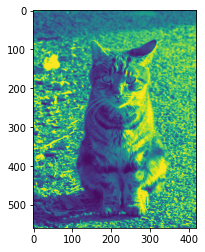

In [4]:
inFile = 'data/images/cat.jpg'
data = plt.imread(inFile)

# In order to work with a gray-level image, take only one of the three layers
gray_cat = data[:, :, 0]

# ... or use the
# from skimage import color
# gray_cat = color.rgb2gray(data)

# If required, you can convert uint8 data to floats, between 0 and 1:
#data_u = img_as_ubyte(data_g)

plt.imshow(gray_cat)
plt.show()

# Note that the default colormap is NOT gray-level!

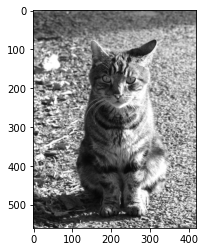

(560, 420)

In [5]:
# If we want to see the image in gray:
plt.set_cmap('gray')
plt.imshow(gray_cat)
plt.show()
gray_cat.shape

## Create 3 filters, and filter the data

Create three filters: one that does not do anything, one that averages over a square with a side-length of "7", and one that averages over a side-length of "15"

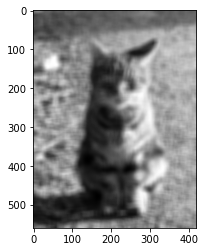

In [6]:
# Create the Filters, with increasing blurring
Filters = list()
Filters.append(np.array([[1.]]))
Filters.append(np.ones((7, 7)) / 49)
Filters.append(np.ones((15, 15)) / 225)

# Apply them
filterWithOpenCV = False
Filtered = []

for Filter in Filters:
    if filterWithOpenCV:
        Filtered.append(cv2.filter2D(gray_cat, -1, Filter))
    else:
        Filtered.append(convolve(gray_cat.astype(float), Filter))

# Show the last filtered output
plt.imshow(Filtered[2])

In [7]:
cv2.filter2D(gray_cat, cv2.CV_32F, Filter)


array([[131.07555 , 131.04    , 131.43556 , ..., 109.066666, 109.92889 ,
        110.26223 ],
       [129.7911  , 129.80002 , 130.24445 , ..., 108.93777 , 109.73776 ,
        110.03999 ],
       [127.62222 , 127.69333 , 128.2     , ..., 108.7689  , 109.5289  ,
        109.808914],
       ...,
       [116.83109 , 116.47997 , 114.04443 , ..., 155.73332 , 158.43553 ,
        159.18222 ],
       [122.875534, 122.50221 , 119.76886 , ..., 160.36444 , 163.62222 ,
        164.58667 ],
       [123.49335 , 123.15111 , 120.39555 , ..., 161.6622  , 164.63109 ,
        165.33333 ]], dtype=float32)

## Create 3 zones
Now I want to place the un-filtered data into the top third, the sligthly smoothed one in the middle, and the strongly smoothed one at the bottom.

First show the three areas ...

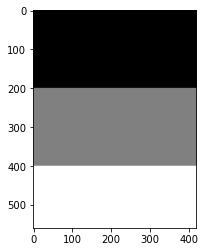

In [8]:
img_type = Filter[0].dtype
Zones = np.zeros(gray_cat.shape, dtype=img_type)
Zones[200:, :] = 1
Zones[400:, :] = 2
plt.imshow(Zones)

## Apply the corresponding filter to each zone
... and finally, put each part of the three filtered images into the corresponding zone:

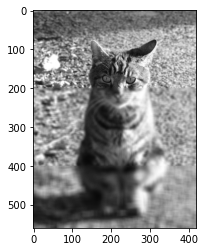

In [9]:
final = np.zeros_like(gray_cat, dtype = img_type)
for ii in np.arange(3):
    final[Zones==ii] = Filtered[ii][Zones==ii]
plt.imshow(final)

## Circular zones

<img src="data/images/Zones.jpg" style="width: 600px;" align="left"/>

* Select fixation point (red cross)
* Find the distance to the 4 corners (yellow dotted lines)
* Find the largest distance to fixation point in image (here e.g. to lower left)
* break down the image into a number of zones (distances from fixation point). In the example, 9 zones are indicated.
* for each zone calulate the average radius (r_0, r_1, ...) [in pixel]. In the example, only 2 radii are indicated, in solid black lines
* for those 10 radii you contruct filters, and apply them to the image, by: 
    - convert r_i from [pixel] to [mm] (see Eq. below)
    - calculate the  size of the corresponding receptive field [in arcmin]
    - convert receptive field size to pixel
    - find sigma_1 => sigma_2
    - generate DOG filter matrix, as a function of radius_to_focusPoint
      e.g.  
      
          [-1/8 -1/8 -1/8
           -1/8  +1  -1/8
           -1/8 -1/8 -1/8]

* put together the overall image

In [10]:
# Parameters
d = 0.6
y = 0.3
r_eye = 1.5e-2

# Geometric setup
alpha = np.arctan2(y, d)
d = r_eye * alpha

[ImgProc_1_Intro.ipynb](ImgProc_1_Intro.ipynb)<img src="data/images/Forward_Backward.png" align='middle'> [ImgProc_3_GanglionCell.ipynb](ImgProc_3_GanglionCell.ipynb)


    Author: Thomas Haslwanter
    Date: Feb 20, 2023

<img src="data/images/CCA_40.png">

*Images Processing*  is licensed under a Creative Commons Attribution 4.0 International License.